# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [6]:
# import libraries here

import pandas as pd
import numpy as np
import pymysql
import getpass
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 500)
%matplotlib inline
sns.set()
sns.set_style("ticks")

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [7]:
# your answer here

employee = pd.read_csv("Employee.csv")

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [8]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [13]:
# your answer here-1st way
employee[["Department","Salary"]].groupby("Department").mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [14]:
# your answer here-2nd way (pivot table)

table = pd.pivot_table(employee, values=["Salary"], index=["Department"], aggfunc={"Salary":np.mean})

In [15]:
table

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [20]:
# your answer here

table2 = pd.pivot_table(employee, values=["Salary"], index=["Department", "Title"], aggfunc={"Salary":np.mean})

table3 = pd.pivot_table(employee, values=["Salary"], index=["Title"], columns=["Department"], aggfunc={"Salary":np.mean})

In [19]:
table2

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [21]:
table3

Salary            
Department     HR    IT Sales
Title                        
VP           70.0  70.0   NaN
analyst      32.5  32.5   NaN
associate     NaN  60.0  55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [29]:
# your answer here
pd.pivot_table(employee, values=["Salary","Name"], index=["Department", "Title"], columns=["Years"], aggfunc={"Salary":np.mean},fill_value="N/A")

Salary                         
Years                     1    2    3    4    7    8
Department Title                                    
HR         VP           N/A  N/A  N/A  N/A  N/A   70
           analyst      N/A   30  N/A   35  N/A  N/A
IT         VP           N/A  N/A  N/A  N/A  N/A   70
           analyst       35   30  N/A  N/A  N/A  N/A
           associate    N/A  N/A  N/A  N/A   60  N/A
Sales      associate    N/A   55   55  N/A  N/A  N/A

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [31]:
# your answer here

pd.pivot_table(employee, values=["Salary","Name"], index=["Department", "Title"],aggfunc={"Salary":np.mean,"Name":"count"},fill_value="N/A")

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [34]:
# your answer here

pd.pivot_table(employee, values=["Salary"], index=["Department", "Title"],aggfunc={"Salary":[np.median,np.min,np.max,np.std]},fill_value="N/A")

Salary                      
                       amax  amin median      std
Department Title                                 
HR         VP          70.0  70.0   70.0      N/A
           analyst     35.0  30.0   32.5  3.53553
IT         VP          70.0  70.0   70.0      N/A
           analyst     35.0  30.0   32.5  3.53553
           associate   60.0  60.0   60.0      N/A
Sales      associate   55.0  55.0   55.0        0

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here

# See above codes

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [35]:
# your answer here

pd.pivot_table(employee, values=["Name","Salary"], index= ["Department"], aggfunc={"Name":"count","Salary":np.sum})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [36]:
# your answer here

pd.pivot_table(employee, values=["Years","Salary"], index= ["Department", "Title"], aggfunc={"Years":np.sum,"Salary":np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [56]:
employee_test=employee.copy()

g = employee_test.groupby(['Department'])['Salary'].transform('max')
employee_test= employee_test[~(employee_test['Salary'] == g)]

employee_test

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
7,Pedro,IT,Phd,M,associate,7,60


In [57]:
# your answer here--Your custom function here

def Delete_a_row(df, col):
    #Make a copy of df
    df1=df.copy()
    #Select the max column and then exclude it/them
    g = df1.groupby([col])['Salary'].transform('max')
    df1= df1[~(df1['Salary'] == g)]
    #Return the computation of the mean salary using pivot table
    return pd.pivot_table(df1, values=["Salary"], index= [col], aggfunc={"Salary":np.mean})

In [58]:
# your answer here


Delete_a_row(employee,"Department")

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [44]:
# your answer here

fitbit = pd.read_csv("Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [59]:
# your answer here

fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [60]:
# your answer here

fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [61]:
# your answer here

fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

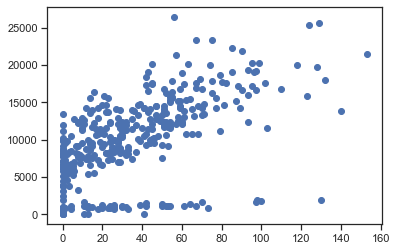

In [63]:
# your answer here

plt.scatter(x=fitbit["Minutes Very Active"], y=fitbit["Steps"]);

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [64]:
# your answer here

fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

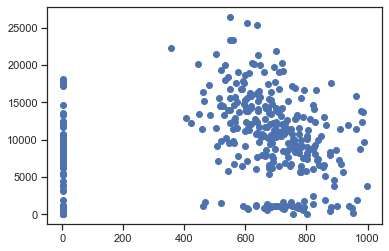

In [65]:
# your answer here

plt.scatter(x=fitbit["Minutes Sedentary"], y=fitbit["Steps"]);

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [66]:
# your answer here

fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

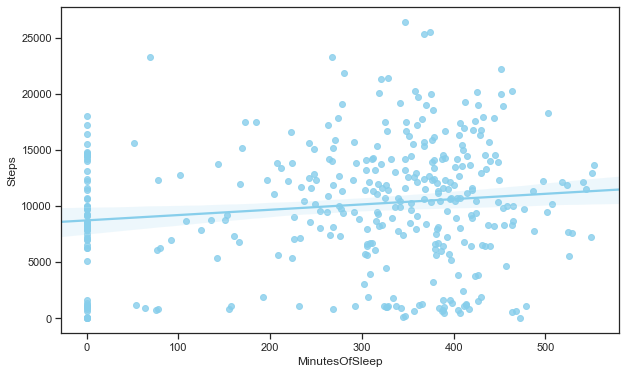

In [100]:
# your answer here

fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(data=fitbit, x="MinutesOfSleep", y="Steps", color="skyblue");

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [77]:
# your answer here

column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

cor_fit = fitbit[column]

cor_fit_check =cor_fit.corr(method="pearson")

In [78]:
#Print cor_fit

cor_fit_check

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [79]:
# your answer here

time_grades = pd.read_csv("Time_Grades.csv")

In [80]:
#Print time_grades

time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

In [82]:
# your answer here
time_grades["Name"].value_counts()

Sonia       1
Eva         1
Jonathan    1
Samuel      1
Alicia      1
Cristina    1
Pilar       1
Jose        1
Maria       1
Pedro       1
Ana         1
Carlos      1
Gemma       1
David       1
Gervasio    1
Name: Name, dtype: int64

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [85]:
# your answer here-Pearson 

time_grades["Study time"].corr(time_grades["Grade"], method="pearson")

0.7980456073578858

In [86]:
## your answer here-Spearman

time_grades["Study time"].corr(time_grades["Grade"], method="spearman")

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

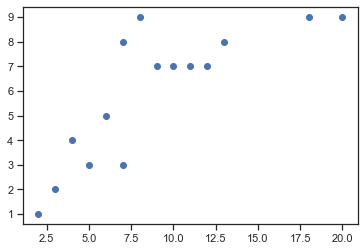

In [89]:
# your answer here


plt.scatter(x=time_grades["Study time"], y=time_grades["Grade"]);

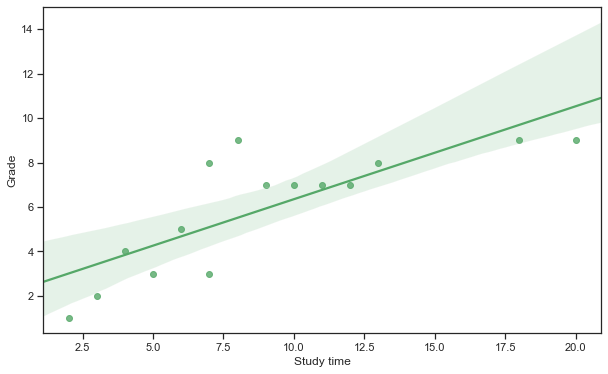

In [88]:
#your comment here

fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(data=time_grades, x="Study time", y="Grade", color="g");

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

## your comment here

Study as hard as you can! It is gonna pay off!!!